<a href="https://colab.research.google.com/github/tnewtont/House_Prices_Linear_Regression/blob/main/house_prices_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import numpy as np
import re
import random
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import missingno as msno
import math

from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
df = train.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will extract the numerical and categorical features and make sure that the total number of features is consistent.

In [5]:
num_cols = df.select_dtypes(exclude = 'object').columns.to_list()
num_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [87]:
cat_cols = df.select_dtypes(include = 'object').columns.to_list()
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [7]:
len(df.select_dtypes(exclude = 'object').columns) + len(df.select_dtypes(include = 'object').columns)

81

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Here, the test data does not have the target SalePrice.

In [9]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [10]:
# Percentage of nulls for each feature in train
percent_missing = df.isnull().sum() * 100 / len(df)
num_missing = df.isnull().sum()
nunique = df.nunique()
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing,
                                 'num_missing': num_missing,
                                 'nunique_vals': nunique})
missing_value_df.sort_values('percent_missing', ascending = False, inplace=True)

In [11]:
# Let's see which features in the training data contain nulls
missing_value_df.loc[missing_value_df['percent_missing'] != 0]

,column_name,percent_missing,num_missing,nunique_vals
PoolQC,PoolQC,99.520548,1453,3
MiscFeature,MiscFeature,96.301370,1406,4
Alley,Alley,93.767123,1369,2
Fence,Fence,80.753425,1179,4
MasVnrType,MasVnrType,59.726027,872,3
FireplaceQu,FireplaceQu,47.260274,690,5
LotFrontage,LotFrontage,17.739726,259,110
GarageQual,GarageQual,5.547945,81,5
GarageFinish,GarageFinish,5.547945,81,3
GarageType,GarageType,5.547945,81,6


In [12]:
# Percentage of nulls for each feature in test
percent_missing_test = test.isnull().sum() * 100 / len(test)
num_missing_test = test.isnull().sum()
nunique_test = test.nunique()
missing_value_test = pd.DataFrame({'column_name': test.columns,
                                 'percent_missing': percent_missing_test,
                                  'num_missing': num_missing_test,
                                  'nunique_vals': nunique_test})
missing_value_test.sort_values('percent_missing', ascending = False, inplace=True)

In [13]:
# Let's now see which features in the test data have nulls
missing_value_test.loc[missing_value_test['percent_missing'] != 0]

,column_name,percent_missing,num_missing,nunique_vals
PoolQC,PoolQC,99.794380,1456,2
MiscFeature,MiscFeature,96.504455,1408,3
Alley,Alley,92.666210,1352,2
Fence,Fence,80.123372,1169,4
MasVnrType,MasVnrType,61.274846,894,3
FireplaceQu,FireplaceQu,50.034270,730,5
LotFrontage,LotFrontage,15.558602,227,115
GarageYrBlt,GarageYrBlt,5.346127,78,97
GarageCond,GarageCond,5.346127,78,5
GarageFinish,GarageFinish,5.346127,78,3


<Axes: >

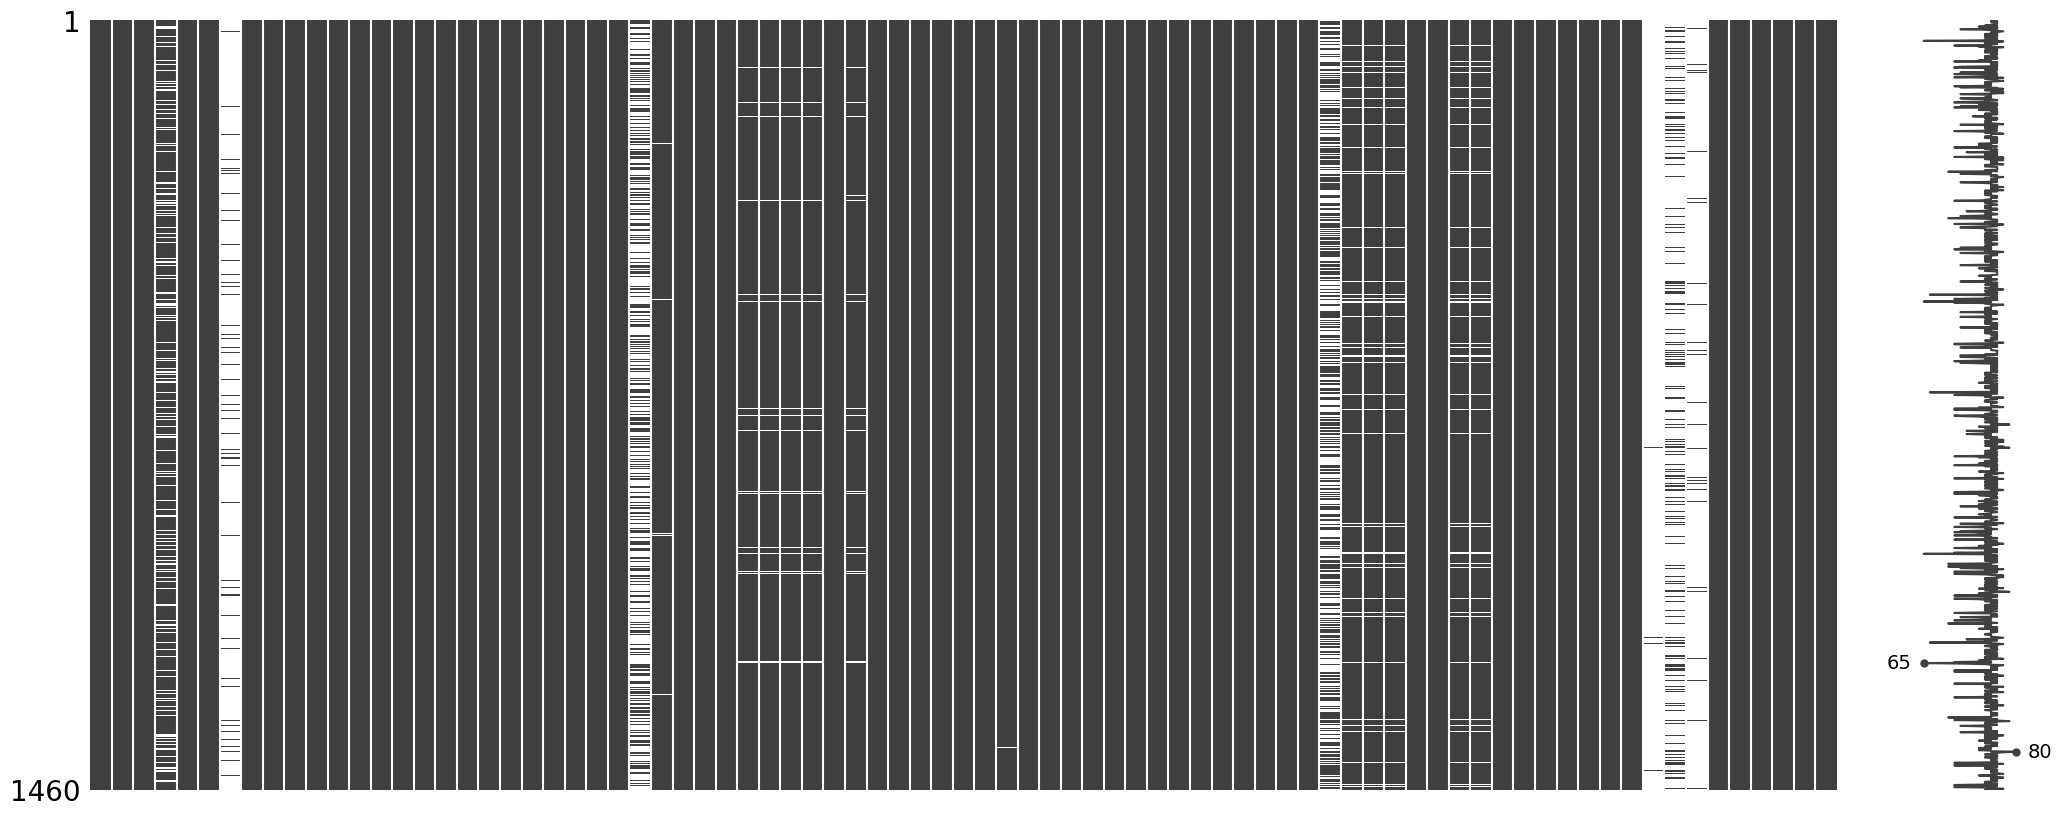

In [14]:
# Visualize the sparisty of some of the features
msno.matrix(df)

Let's check for skewness in each numerical feature by plotting histograms and box plots.

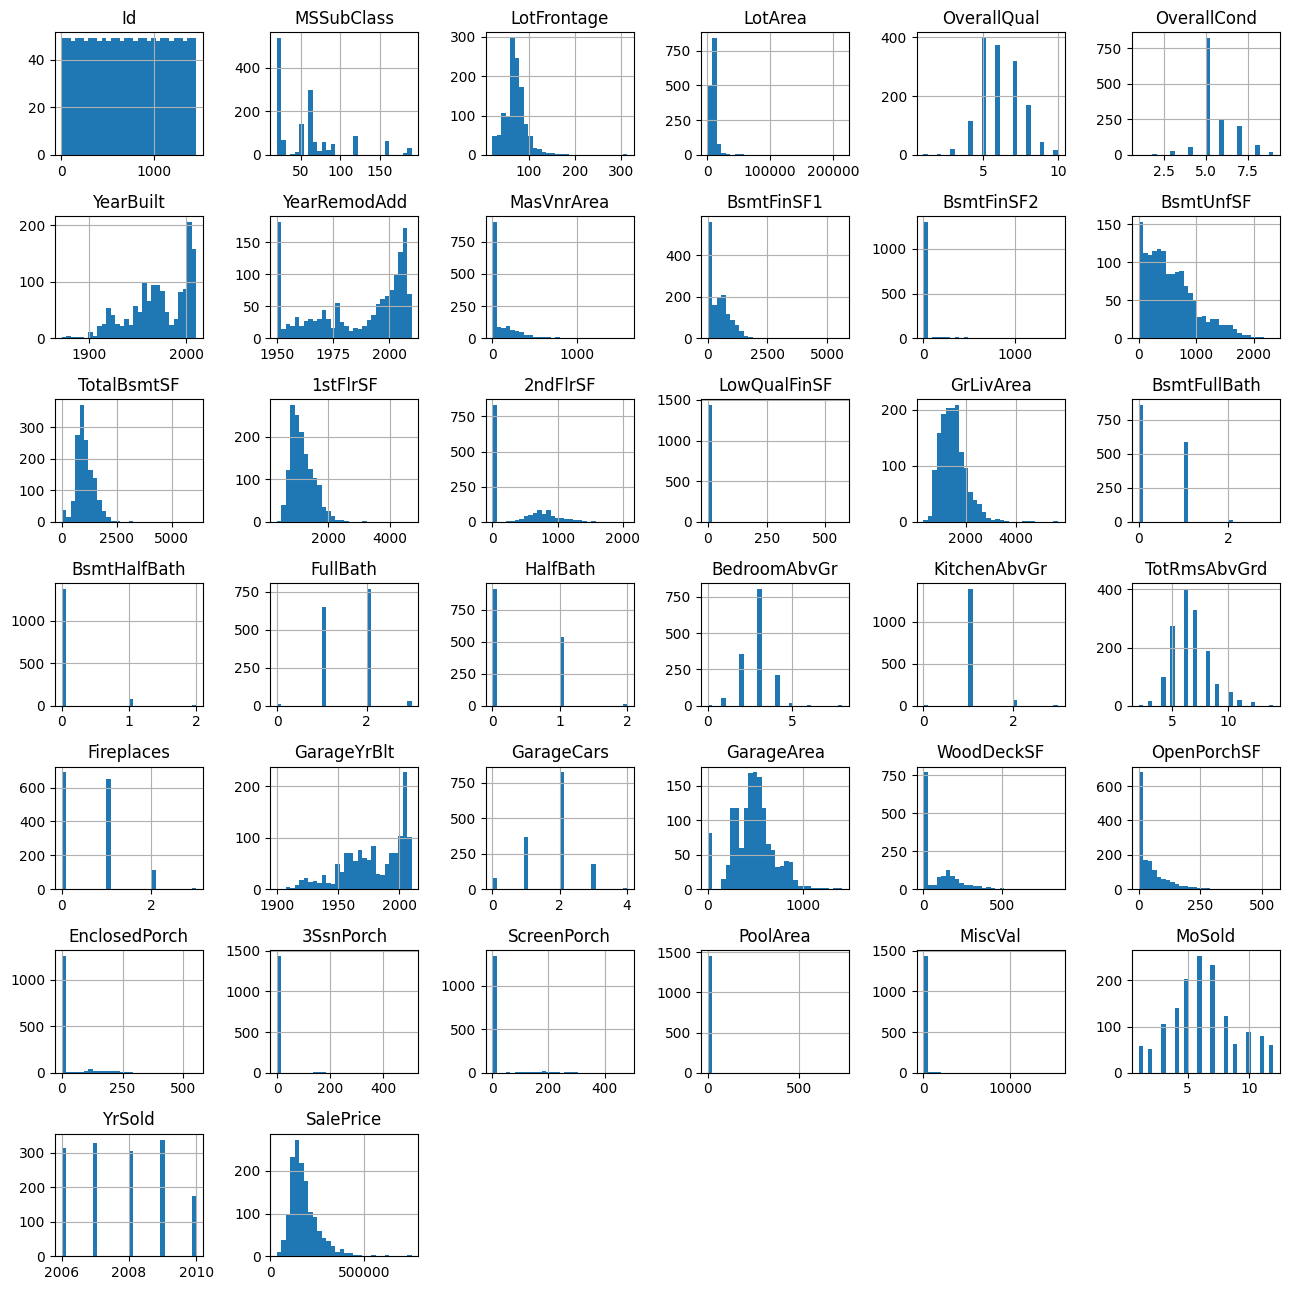

In [15]:
df.hist(column = num_cols, figsize = (13,13), bins = 30)
plt.tight_layout()
plt.show()

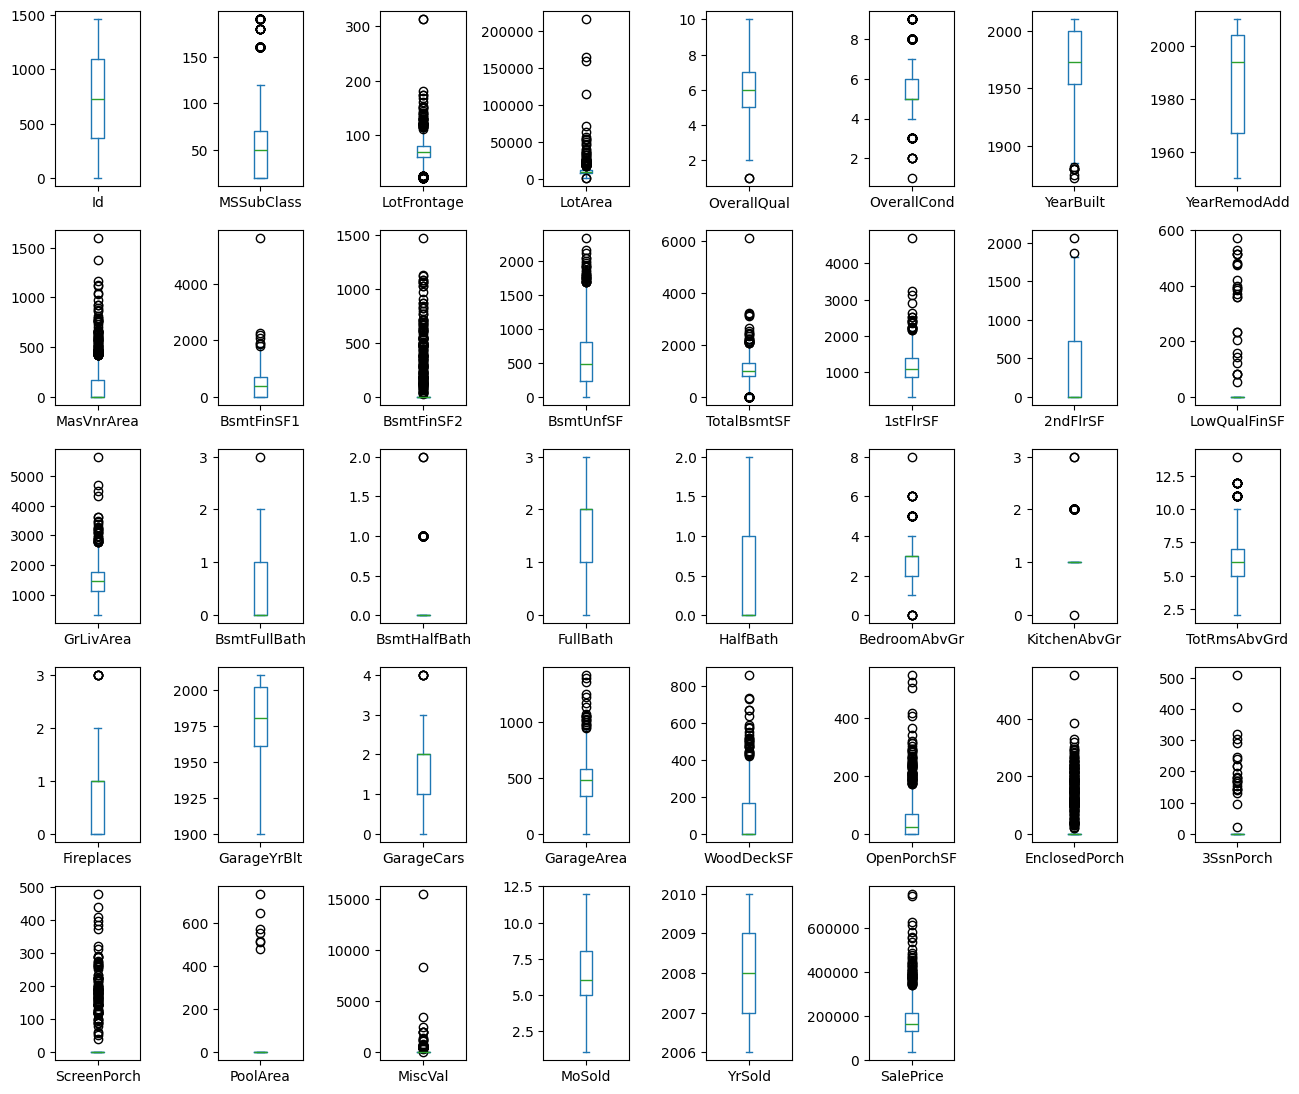

In [16]:
df[num_cols].plot(kind='box', subplots=True, layout=(6, 8), figsize=(13, 13))
plt.tight_layout()
plt.show()

We want to now specifically see the distribution of the target, SalePrice, by visualizing it
with a histogram and boxplot side-by-side.

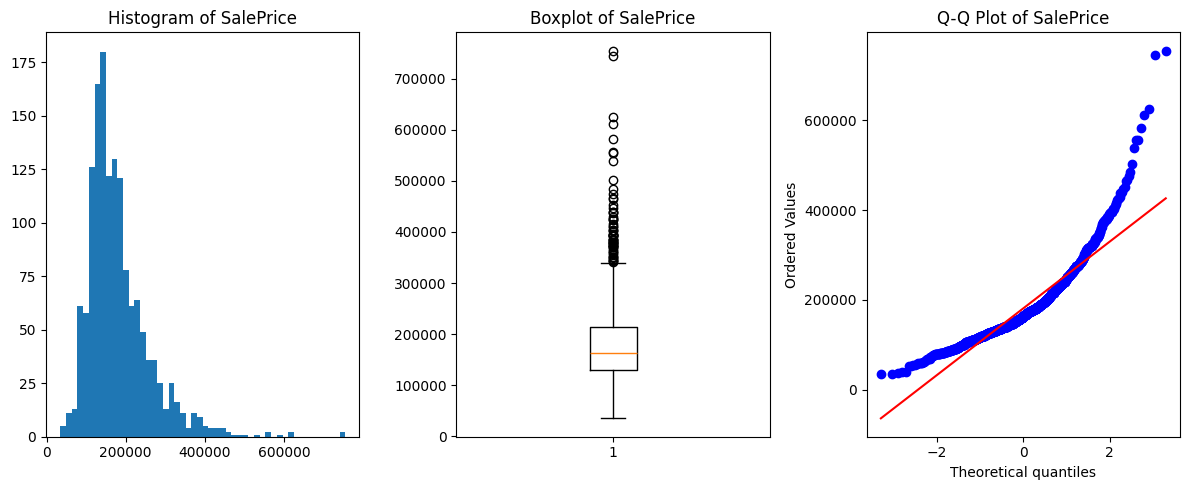

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Histogram
axes[0].hist(df['SalePrice'], bins = 50)
axes[0].set_title('Histogram of SalePrice')

# Boxplot
axes[1].boxplot(df['SalePrice'])
axes[1].set_title('Boxplot of SalePrice')

# Q-Q plot
stats.probplot(df['SalePrice'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot of SalePrice')

plt.tight_layout()

plt.show()


Based on these two plots, we see that SalePrice is heavily right-skewed with a handful of outliers, which means we will need to transform these; we will apply the Box-Cox transformation to address this.

In [77]:
pt = PowerTransformer(method = 'box-cox')
SP_transformed = pt.fit_transform(df[['SalePrice']])
SP_transformed = SP_transformed.flatten()

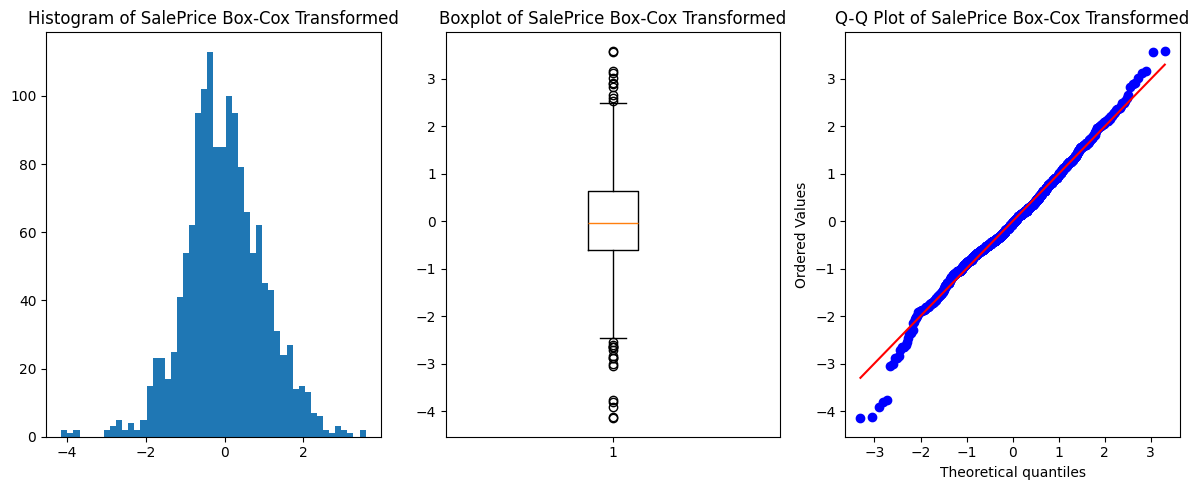

In [81]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Histogram
axes[0].hist(SP_transformed, bins = 50)
axes[0].set_title('Histogram of SalePrice Box-Cox Transformed')

# Boxplot
axes[1].boxplot(SP_transformed)
axes[1].set_title('Boxplot of SalePrice Box-Cox Transformed')

# Q-Q plot
stats.probplot(SP_transformed, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot of SalePrice Box-Cox Transformed')

plt.tight_layout()

plt.show()

As shown above, applying the Box-Cox transformation to our target variable SalePrice has normalized it considerably.

Now let's see how the numerical features correlate with each other. We will do this by plotting out a heatmap. Redder means more positively correlated, and blue means more negatively correlated.

In [18]:
corr_mat = df[num_cols].corr()

Text(0.5, 1.0, 'Heatmap of Correlation of Numerical Features')

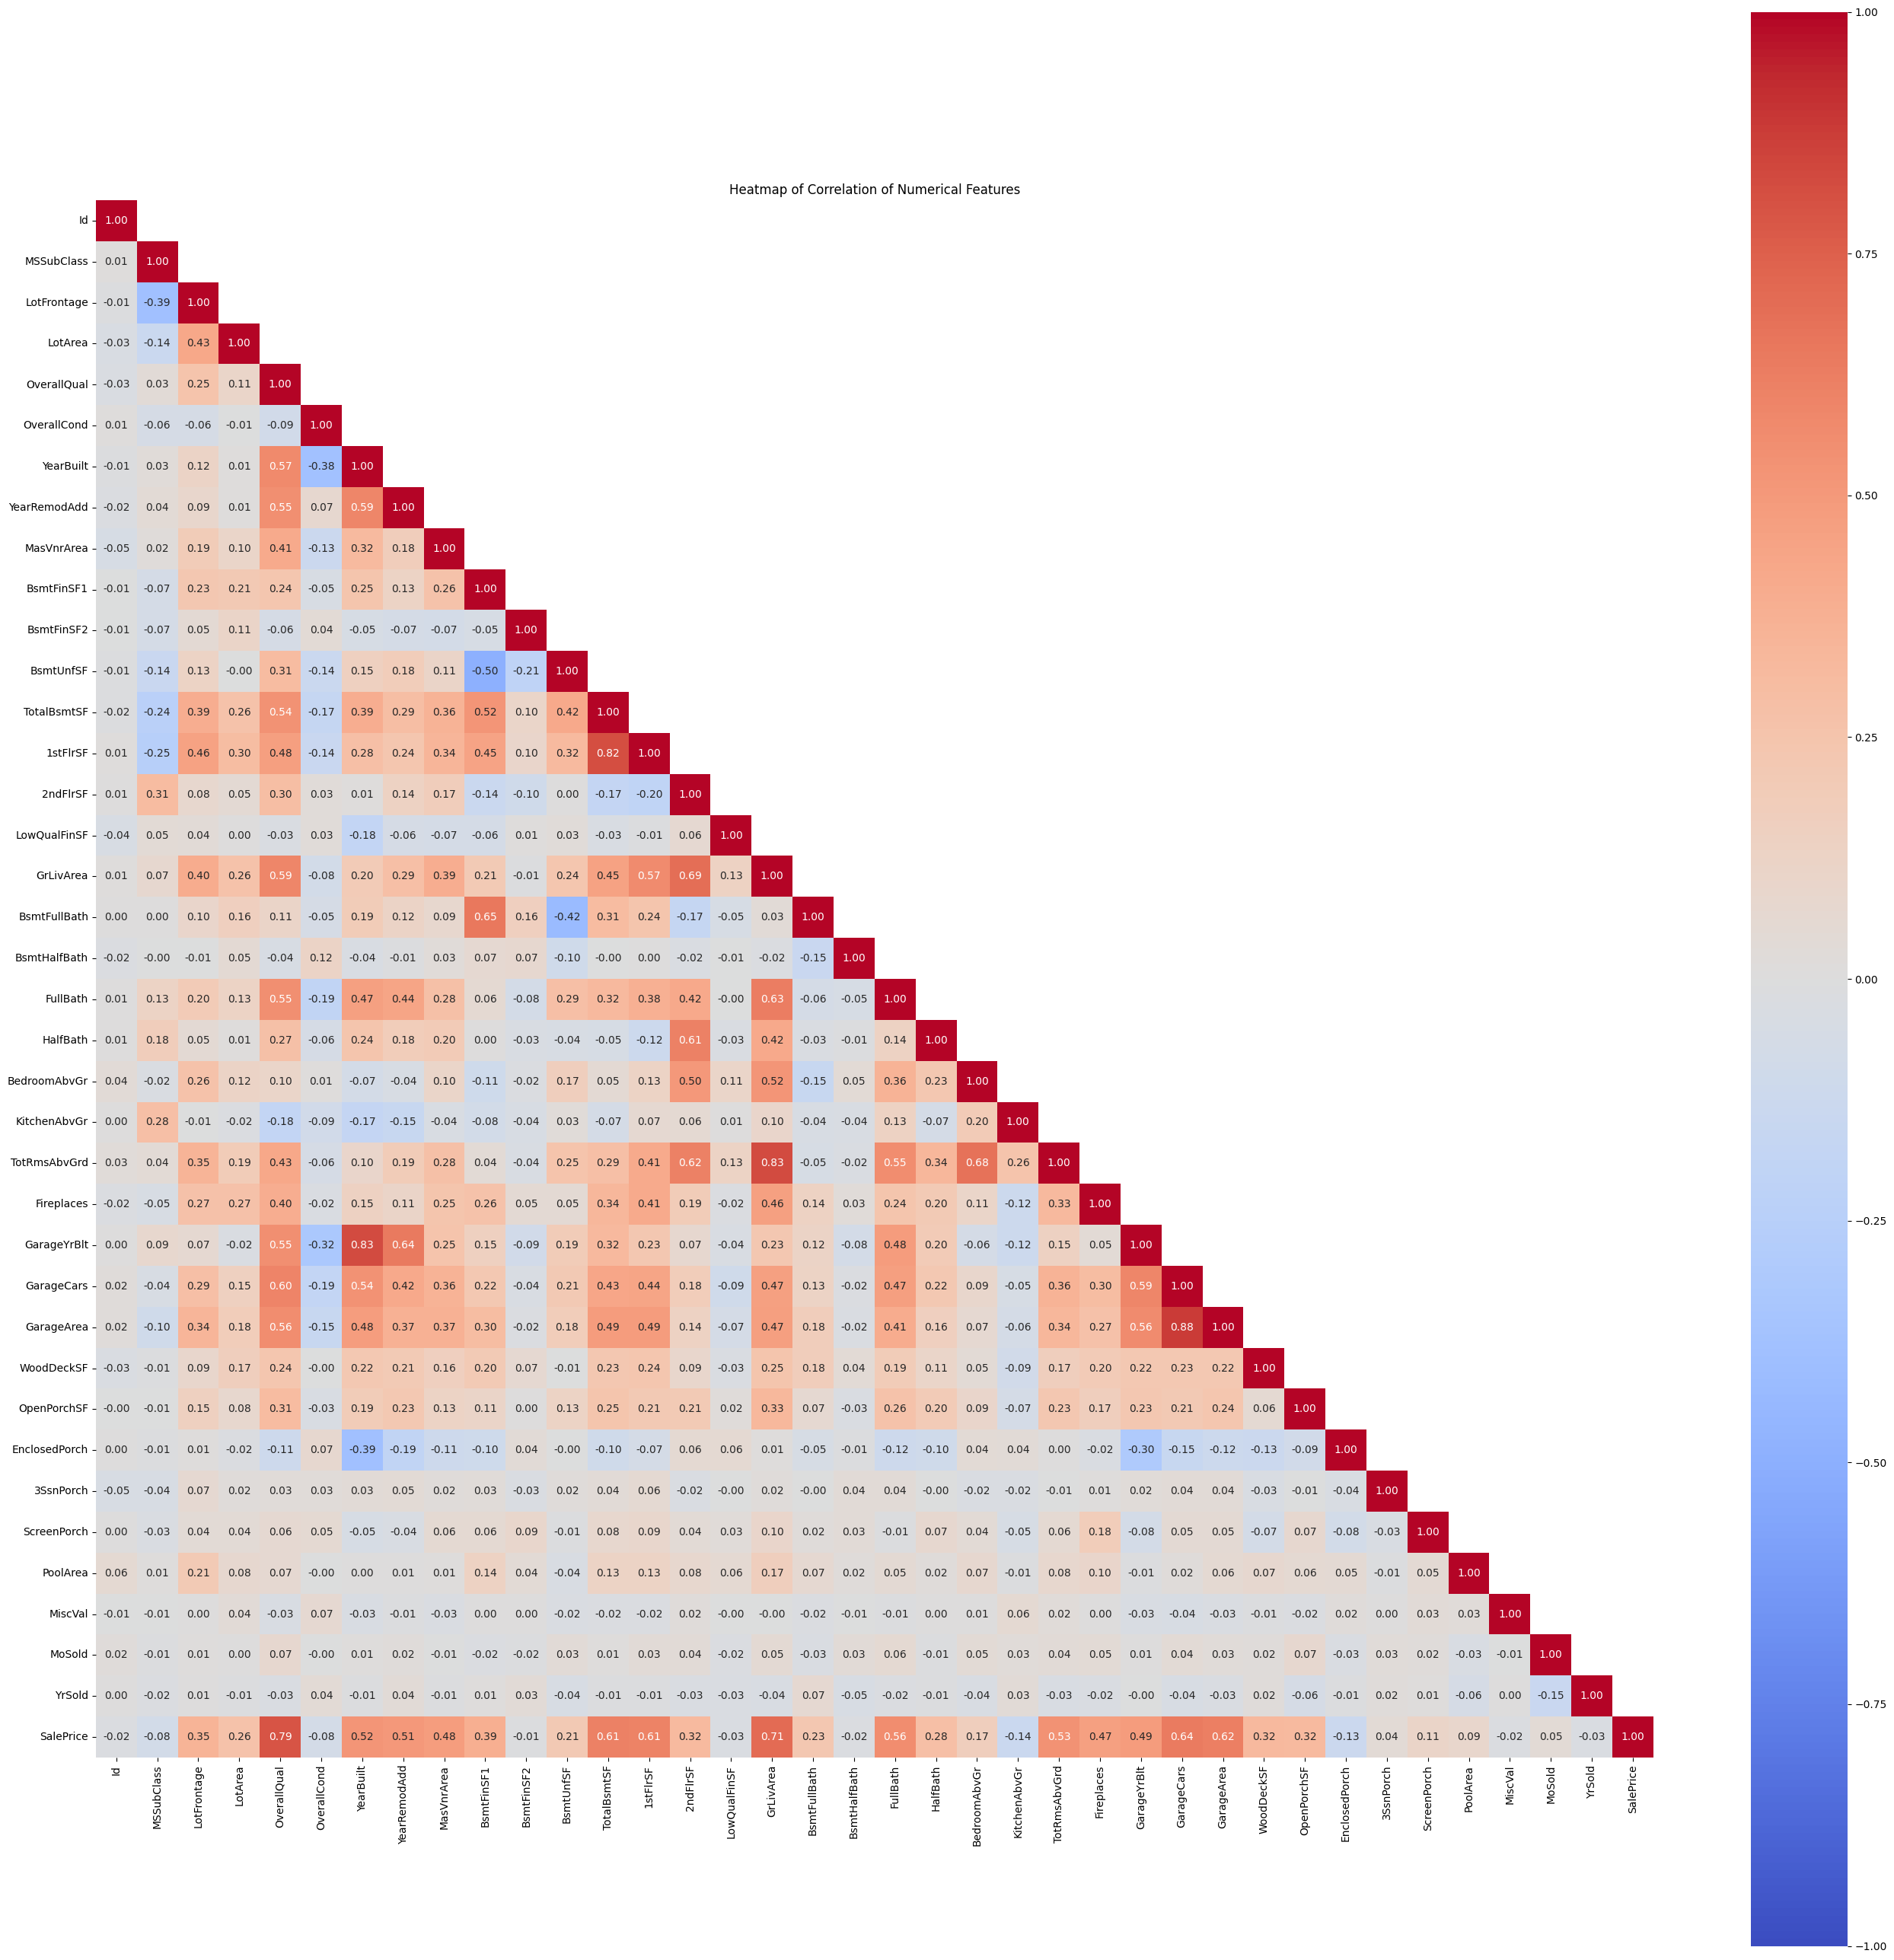

In [56]:
# Since the matrix is symmetric, we will apply a mask
# mask = np.array(corr_mat)
# mask[np.tril_indices_from(mask)] = False
mask = np.triu(np.ones(corr_mat.shape), k = 1).astype(bool)
fig=plt.gcf()
fig.set_size_inches(33,33)
sns.heatmap(corr_mat, annot = True, fmt = '.2f', mask = mask, square = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Heatmap of Correlation of Numerical Features')

Let's now filter out the features that have stronger correlation so that we can more clearly visualize.

In [58]:
threshold = 0.5
stronger_corr = corr_mat[(corr_mat > threshold) | (corr_mat < -(threshold))]

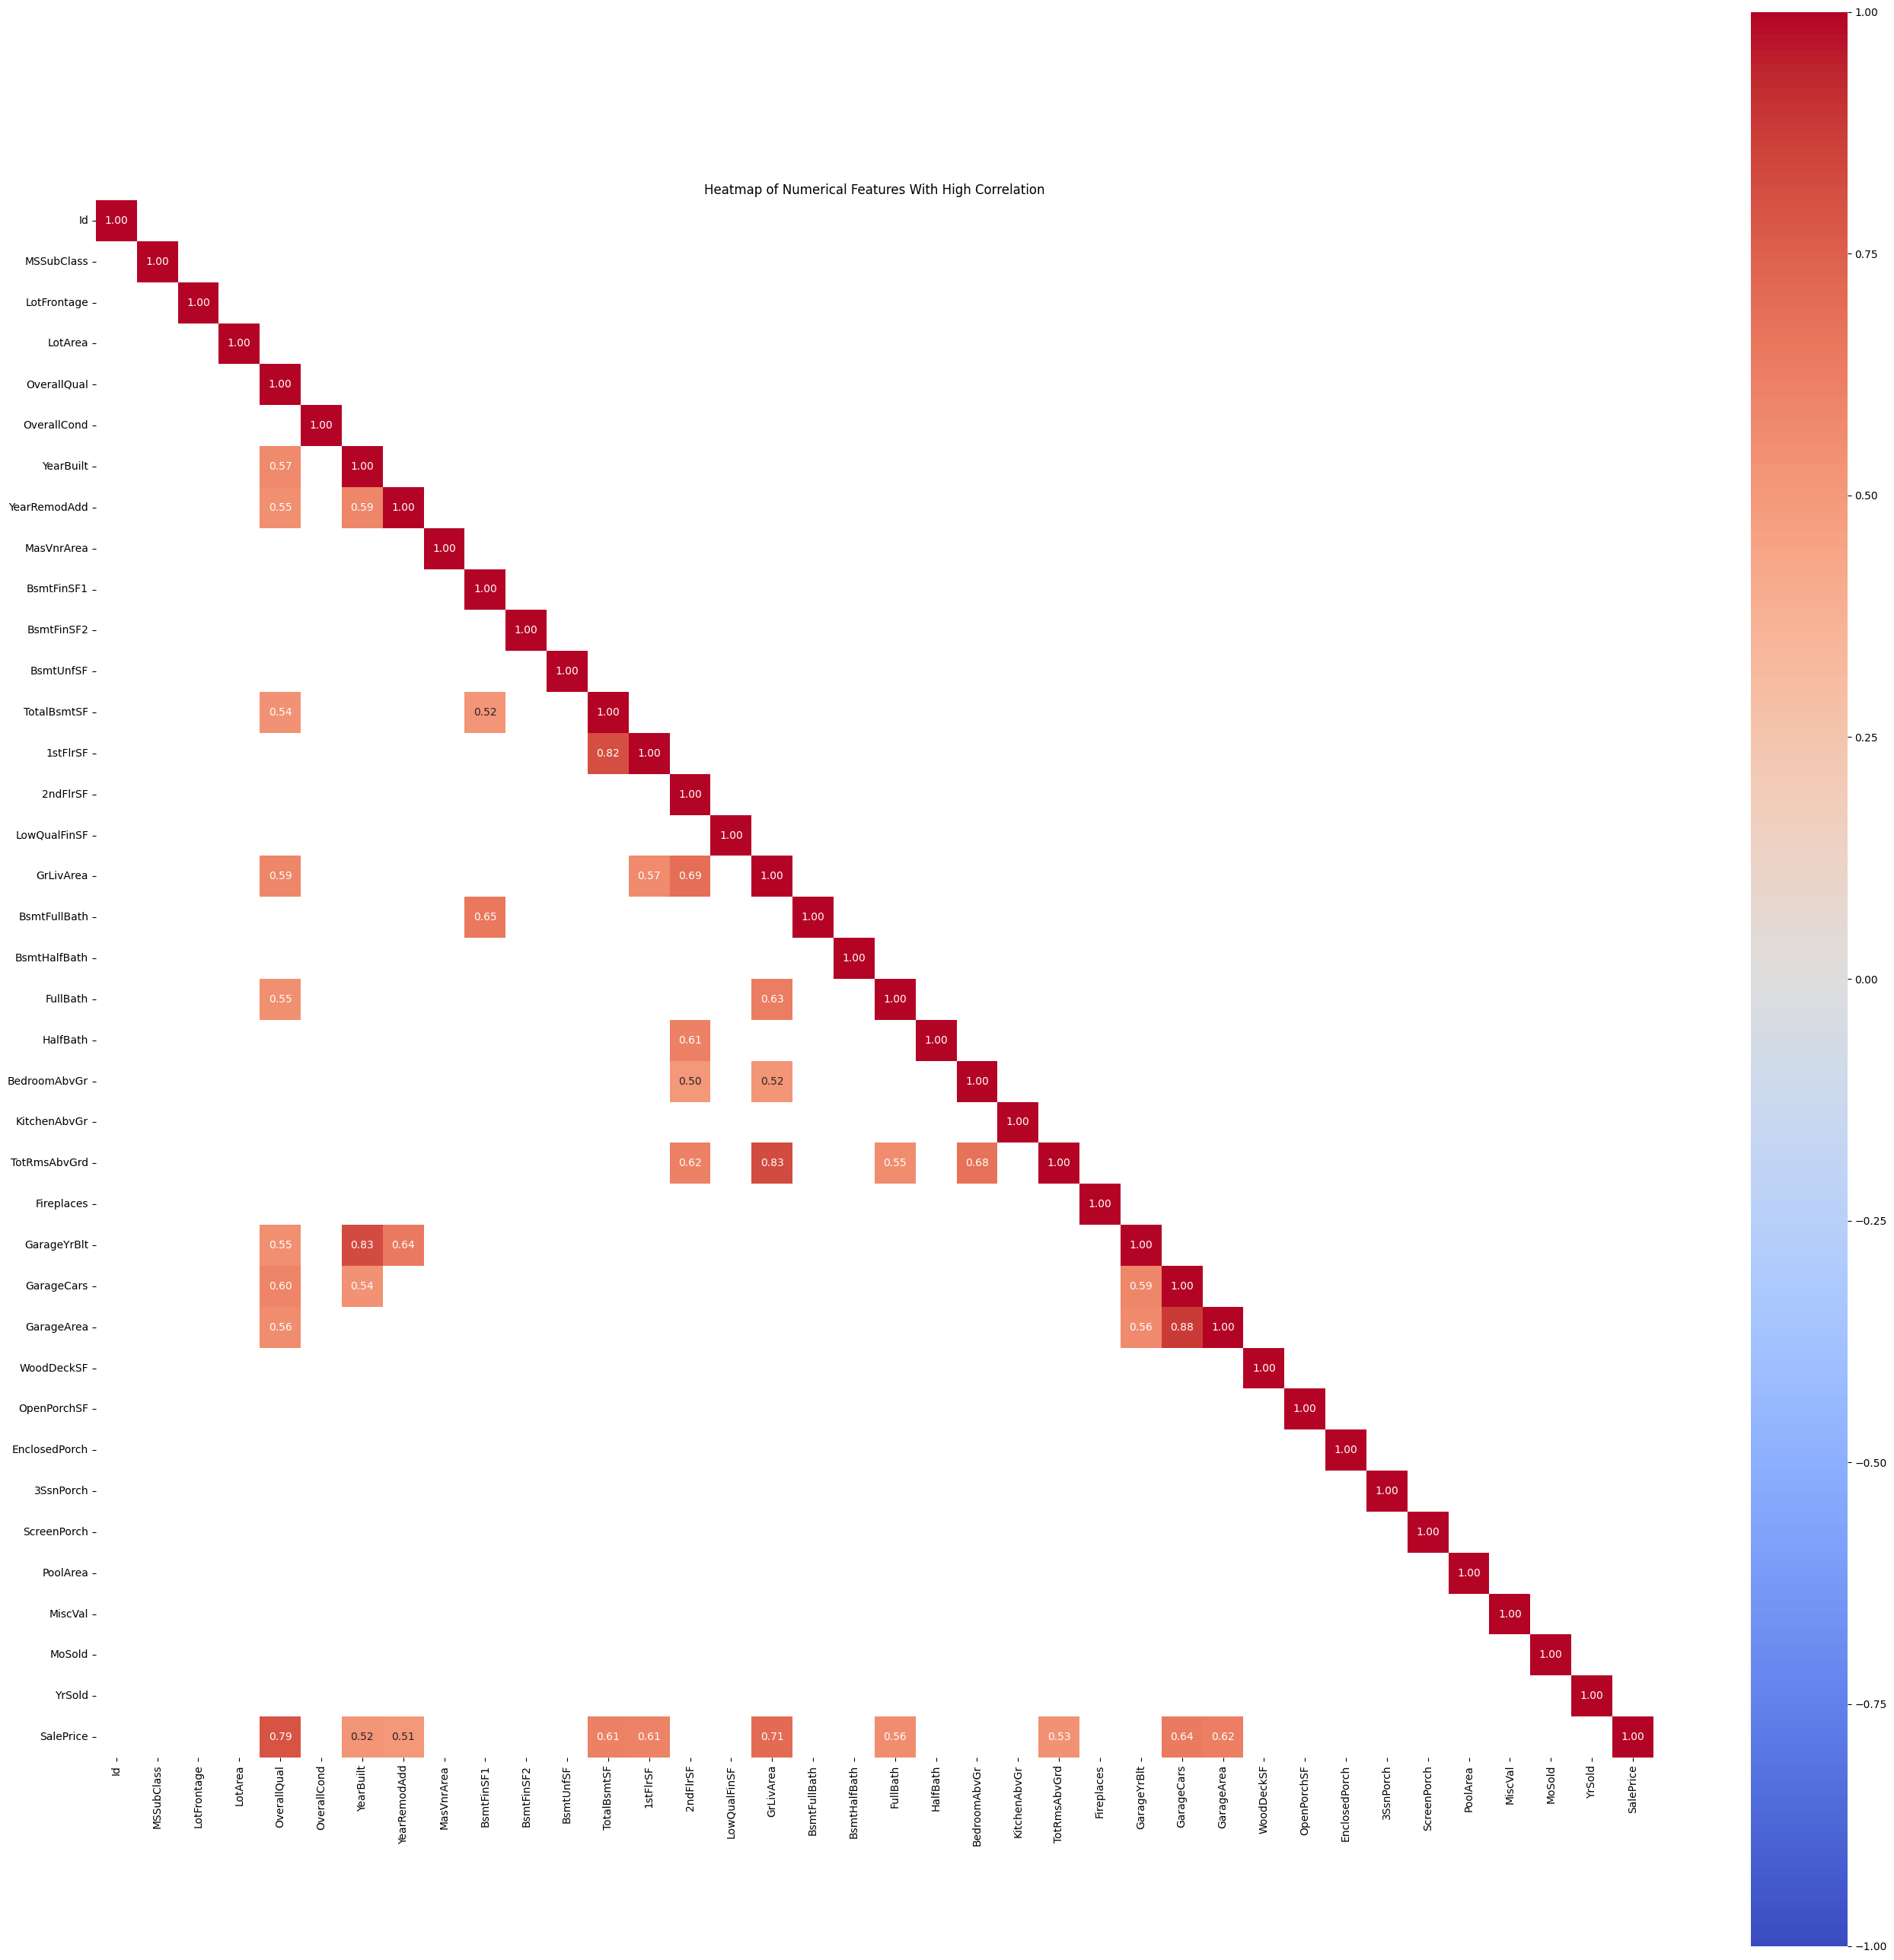

In [59]:
plt.figure(figsize = (33,33))
sns.heatmap(stronger_corr, annot = True, fmt = '.2f', mask = mask, square = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Heatmap of Numerical Features With High Correlation')
plt.show()

Based on this heatmap, we see that some features like GarageYrBlt, GarageCars, and GarageArea show positive correlation with each other.

Since the correlation matrix is symmetric, we can make the correlation values more interpretable by extracting the pairs and saving them as a separate dataframe.

In [62]:
corr_pairs = corr_mat.where(mask).stack()

strong_corr = corr_pairs[abs(corr_pairs) >= threshold]
strong_corr

OverallQual   YearBuilt       0.572323
              YearRemodAdd    0.550684
              TotalBsmtSF     0.537808
              GrLivArea       0.593007
              FullBath        0.550600
              GarageYrBlt     0.547766
              GarageCars      0.600671
              GarageArea      0.562022
              SalePrice       0.790982
YearBuilt     YearRemodAdd    0.592855
              GarageYrBlt     0.825667
              GarageCars      0.537850
              SalePrice       0.522897
YearRemodAdd  GarageYrBlt     0.642277
              SalePrice       0.507101
BsmtFinSF1    TotalBsmtSF     0.522396
              BsmtFullBath    0.649212
TotalBsmtSF   1stFlrSF        0.819530
              SalePrice       0.613581
1stFlrSF      GrLivArea       0.566024
              SalePrice       0.605852
2ndFlrSF      GrLivArea       0.687501
              HalfBath        0.609707
              BedroomAbvGr    0.502901
              TotRmsAbvGrd    0.616423
GrLivArea     FullBath        0.630012
              BedroomAbvGr    0.521270
              TotRmsAbvGrd    0.825489
              SalePrice       0.708624
FullBath      TotRmsAbvGrd    0.554784
              SalePrice       0.560664
BedroomAbvGr  TotRmsAbvGrd    0.676620
TotRmsAbvGrd  SalePrice       0.533723
GarageYrBlt   GarageCars      0.588920
              GarageArea      0.564567
GarageCars    GarageArea      0.882475
              SalePrice       0.640409
GarageArea    SalePrice       0.623431
dtype: float64

In [65]:
strong_corr_df = strong_corr.reset_index()
strong_corr_df.columns = ['Feature1', 'Feature2', 'Correlation']
strong_corr_df.sort_values(by = 'Correlation', ascending = False)

,Feature1,Feature2,Correlation
35,GarageCars,GarageArea,0.882475
10,YearBuilt,GarageYrBlt,0.825667
27,GrLivArea,TotRmsAbvGrd,0.825489
17,TotalBsmtSF,1stFlrSF,0.819530
8,OverallQual,SalePrice,0.790982
28,GrLivArea,SalePrice,0.708624
21,2ndFlrSF,GrLivArea,0.687501
31,BedroomAbvGr,TotRmsAbvGrd,0.676620
16,BsmtFinSF1,BsmtFullBath,0.649212
13,YearRemodAdd,GarageYrBlt,0.642277


After sorting this dataframe by correlation value in descending order, we can see that for some feature pairs, such as GarageCars with GarageArea and YearBuilt with GarageYrBuilt, they seem to exhibit multicolinearity. For the former, it makes more sense that a house is more attractive to buy if it has a garage. With this in mind, we can perhaps feature engineer a boolean-valued feature such as HasGarage, where 0 indicates no garage, and 1 indicates a garage. For the latter, it's possible that a house might've had a garage built later on. We can probably construct a feature called HouseAge from YearBuilt by calculating the house's age, as this can be a crucial factor in house purchases; this makes GarageYrBuilt not as important.

Let's now take a closer look at how the numerical features correlate with the target variable SalePrice.

In [60]:
corr_SP = df[num_cols].corr()['SalePrice'].sort_values(ascending = False)
corr_SP

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [92]:
# Check which features are above our threshold
corr_SP_notable = corr_SP[corr_SP > threshold]
corr_SP_notable

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


Highly Important Features (> 0.7)
*   OverallQual
*   GrLivArea

Considerable Features (< 0.7)
*   GarageCars
*   GarageArea
*   TotalBsmtSF
*   1stFlrSF
*   Fullbath
*   TotRmsAbvGrd
*   YearBuilt
*   YearRemodAdd

We can visualize these values as a simple bar graph, as shown below.

In [113]:
corr_SP_notable_cols = corr_SP_notable[1:].index.to_list()

<Axes: >

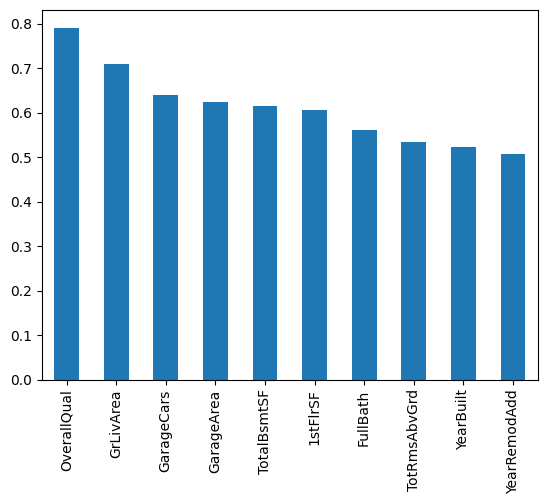

In [95]:
corr_SP_notable[1:].plot(kind = 'bar')

Let's investigate some of the features correlated to SalePrice by plotting their boxplot and their respective count plots side-by-side.

In [139]:
# Get the columns that are relatively low-cardinality
df[corr_SP_notable_cols].nunique().sort_values(ascending = True)

,0
FullBath,4
GarageCars,5
OverallQual,10
TotRmsAbvGrd,12
YearRemodAdd,61
YearBuilt,112
GarageArea,441
TotalBsmtSF,721
1stFlrSF,753
GrLivArea,861


In [142]:
corr_SP_notable_cols2 = df[corr_SP_notable_cols].nunique().sort_values(ascending = True).index.to_list()[0:4]
corr_SP_notable_cols3 = df[corr_SP_notable_cols].nunique().sort_values(ascending = True).index.to_list()[6:]

In [143]:
corr_SP_notable_cols2

['FullBath', 'GarageCars', 'OverallQual', 'TotRmsAbvGrd']

In [144]:
corr_SP_notable_cols3

['GarageArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea']

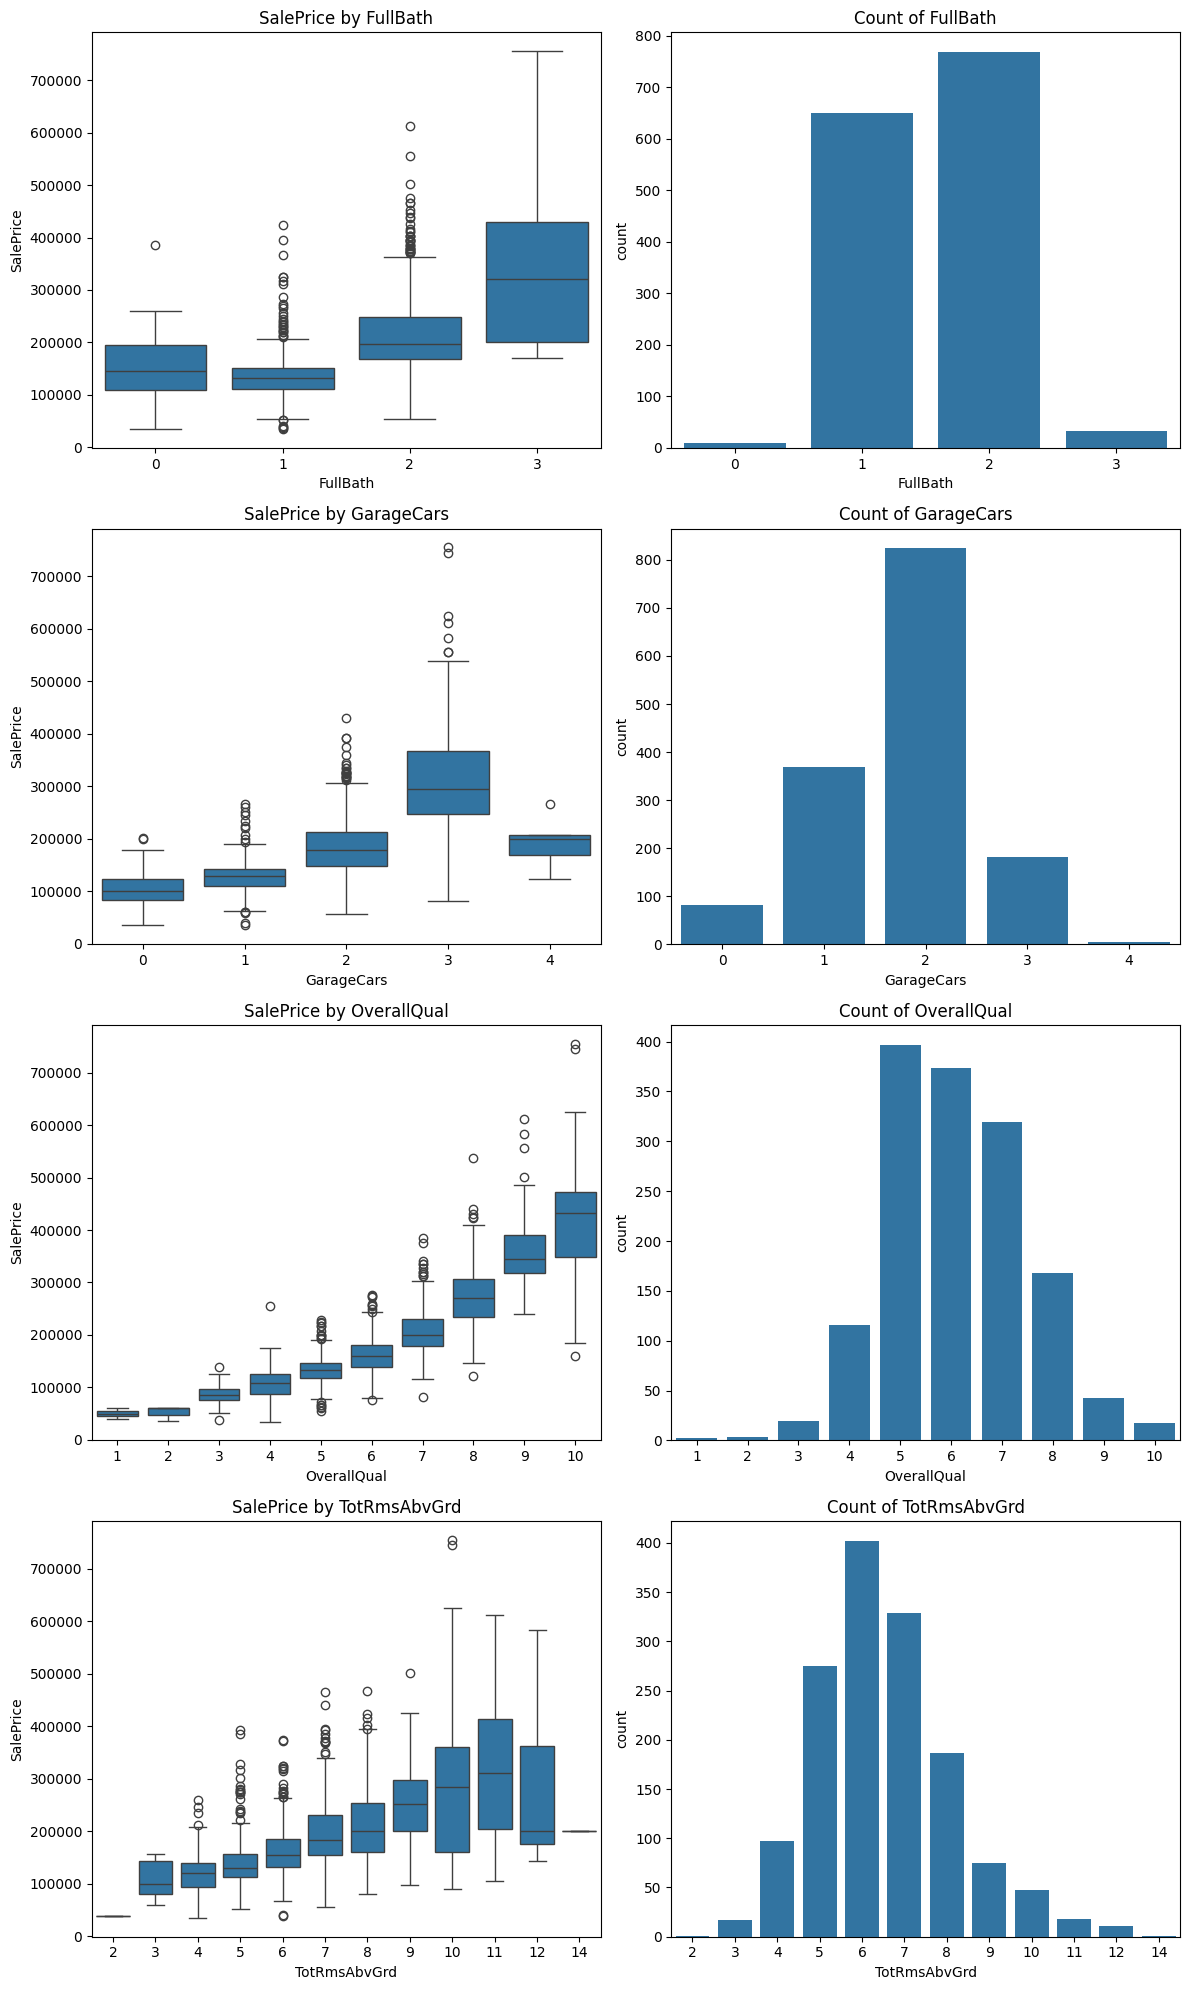

In [157]:
n_features = len(corr_SP_notable_cols2)
fig, axes = plt.subplots(n_features, 2, figsize=(12, 5 * n_features))

for i, feature in enumerate(corr_SP_notable_cols2):
    # Boxplot: SalePrice vs. feature
    sns.boxplot(df, x=feature, y='SalePrice', ax=axes[i, 0])
    axes[i, 0].set_title(f'SalePrice by {feature}')

    # Countplot: frequency of the feature categories
    sns.countplot(data=df, x=feature, ax=axes[i, 1])
    axes[i, 1].set_title(f'Count of {feature}')

plt.tight_layout()
plt.show()

Based on the plots above, we observe that:


1.   For FullBath, most of the houses have either 1 or 2 full bathrooms. As the number of full bathrooms increase, so does the SalePrice. There is a considerable amount of outliers in SalePrice for houses that have 1 or 2 full bathrooms.
2.   For GarageCars, most of the houses can fit 1 or 2 cars. We see a clear increase of SalePrice when there is a garage built, albeit not so much if the garage can carry 4 cars. There are many outliers in SalePrice for houses with garages that can fit between 1 or 2 cars, while not as much for the case of 3 cars.
3.   For OverallQual, we definitely see that most of the houses are rated either 5, 6, and 7, which can be considered 'average'; there aren't as many houses rated 8 or above. We also see a definite increase in SalePrice as the OverallQual score increases. There are outliers in SalePrice for houses rated between 5 and 7 in OverallQual.
4. For TotRmsAbvGrd, we see most of the houses have between 5 to 8 rooms above ground. As the number of rooms increase, so does SalePrice. It seems that many of the outliers are concentrated for houses with 5 to 7 rooms above ground. Interestingly enough, we also see some extreme cases of houses with 11, 12, or even 14 rooms.



Now let's take a look at the scatter plots of the remaining features correlated to SalePrice (we'll ignore YearRemodAdd and YearBuilt for easier interpretability).

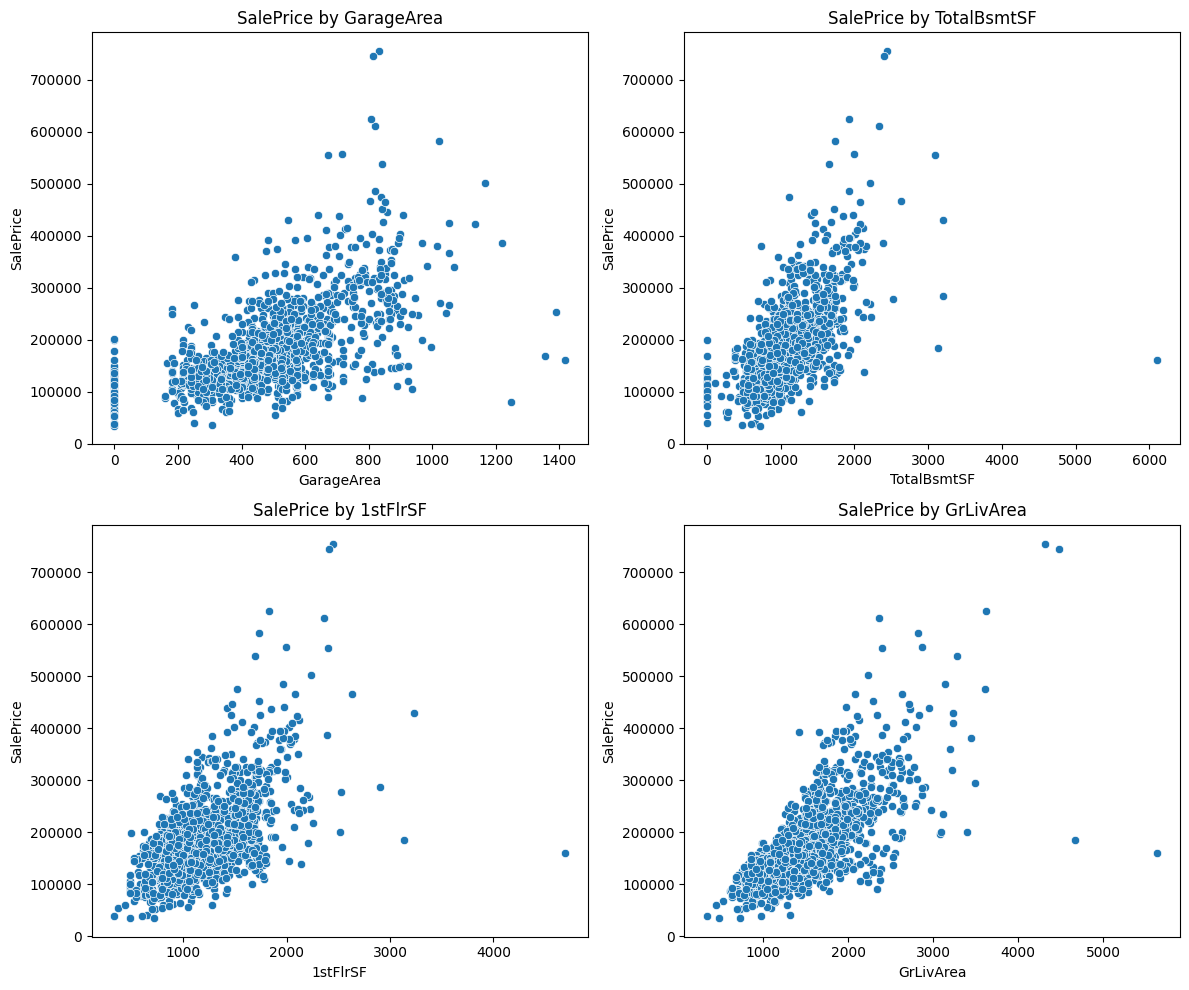

In [151]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # flatten to simplify indexing

for i, feature in enumerate(corr_SP_notable_cols3):
    sns.scatterplot(data=df, x=feature, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'SalePrice by {feature}')

plt.tight_layout()
plt.show()

In all of these scatter plots, we see that as each feature increases, so does SalePrice. However, we should take note of the outliers in each scatter plot.

1.   For GarageArea, we see that a bigger garage does not necessarily mean a more expensive house. In this case, we see that some houses with a GarageArea of around 800 are significantly more expensive than those with a GarageArea of around 1400. We should also note the many data points that have no garage.
2.   For TotalBsmtSF, while we do generally see a steep increase of SalePrice, we observe one outlier with a TotalBsmtSF value of slightly over 6000, but its respective price is around \$150,000. Similarly to above, we should also note of houses that do not have a basement.
3.   For 1stFlrSF, similarly to TotalBsmtSF, we see a steep increase of SalePrice. One outlier with a TotalBsmtSF value of around 5000 has a respective SalePrice of around \$160,000 to \$170,000. The same applies with a couple houses with a 1stFlrSF value of around 2500, but their respective prices are a bit over \$750,000.
4. For GrLivArea, we definitely see a few outliers where some houses might have expansive ground living area but aren't as expensive. Additionally, we see houses that do have considerable ground living area but are much more expensive than all other houses. In this case, we see many of the outliers located where GrLivArea is approximately greater than 3500.



Now let's investigate the categorical features. First, we should look at how many unique values that each of these take on, as this will inform us how we should proceed with encoding them.

In [98]:
df[cat_cols].nunique().sort_values(ascending = False)

,0
Neighborhood,25
Exterior2nd,16
Exterior1st,15
Condition1,9
SaleType,9
HouseStyle,8
RoofMatl,8
Condition2,8
Functional,7
BsmtFinType2,6


We will now visualize these counts by plotting count plots of each of the features side-by-side, as a grid of subplots.

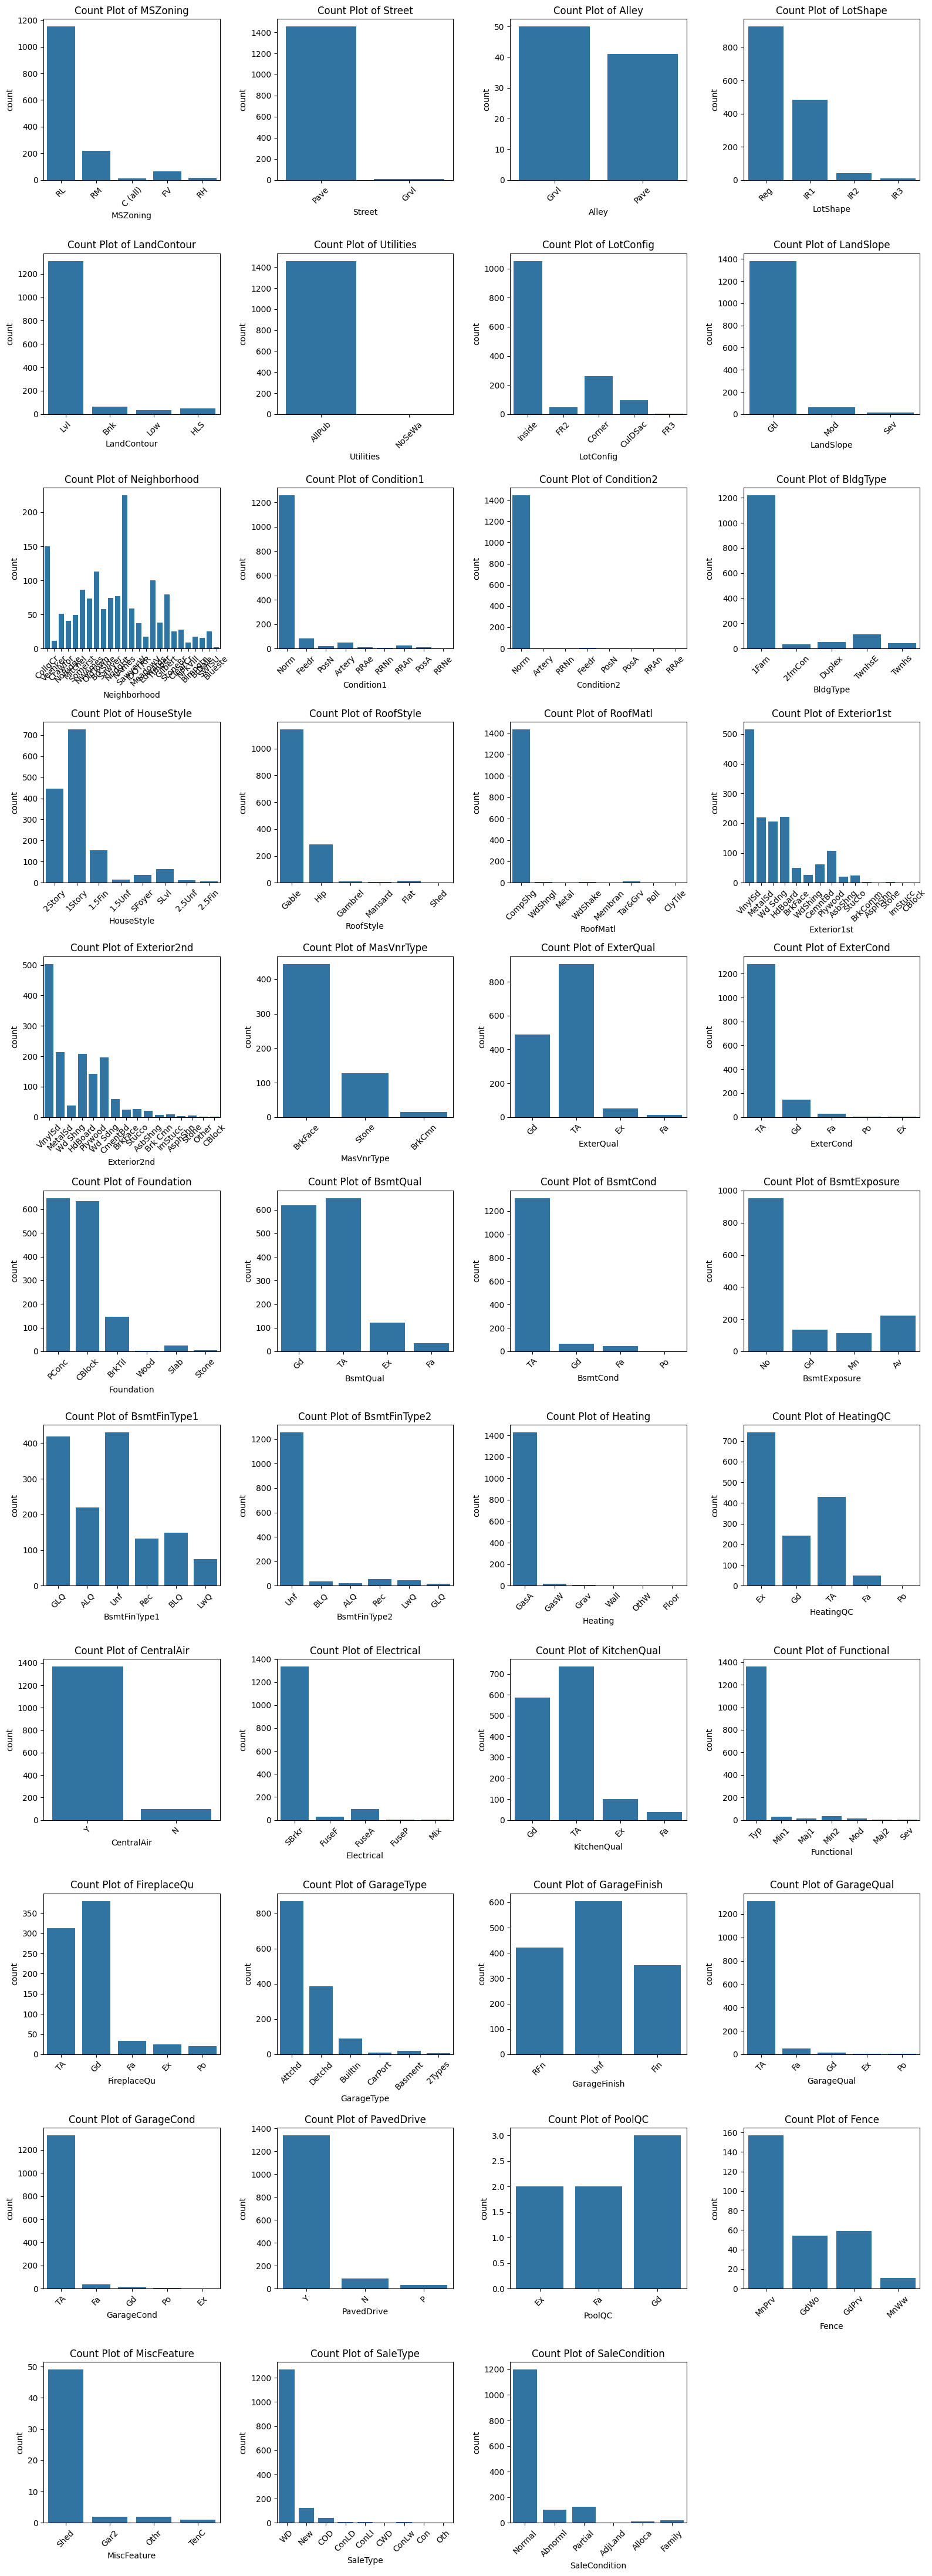

In [102]:
# Determine grid size
n_features = len(cat_cols)
n_cols = 4  # desired number of columns
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()  # Flatten in case axes is a 2D array

# Loop through each categorical feature and create a count plot
for i, feature in enumerate(cat_cols):
    sns.countplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'Count Plot of {feature}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-labels if needed

# Remove any empty subplots if there are more axes than features
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


As we can see from this grid of count plots, some features that are binary (i.e. only containing two distinct values), such as Street and Utilities, might not matter as much. Likewise, for categorical features that take on more than two values, such as RoofMatl, Condition2, and Heating, they also might not matter as much. Thus, we might be able to drop these features altogether. For some high-cardinality features like Neighborhood, Exterior1st, and Exterior2nd, we might utilize target encoding, whereas for low to medium-cardinality features we will use one-hot encoding.

In [103]:
df['SaleType'].value_counts(normalize = True)

,proportion
SaleType,
WD,0.867808
New,0.083562
COD,0.029452
ConLD,0.006164
ConLI,0.003425
ConLw,0.003425
CWD,0.002740
Oth,0.002055
Con,0.001370
